In [316]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# CL1

# IBP normal

In [171]:
with open('../ddm/results/split_mnist_res5_split_normal_l1_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [172]:
with open('../ddm/results/split_mnist_res5_split_normal.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50'])

In [173]:
with open('../ddm/results/split_mnist_res5_mh_beta_hack.pkl', 'rb') as input_file:
    d_beta = pickle.load(input_file)
d_beta.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [174]:
with open('../ddm/results/split_mnist_res5_split_mnist_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [175]:
with open('results/split_mnist_smnist_cl2_no_gr_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [176]:
with open('results/split_mnist_smnist_cl2_ts_.pkl', 'rb') as input_file:
    d_ts_gr = pickle.load(input_file)
d_ts_gr.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [177]:
d_ts['vcl_ibp'][0,0,:,:]

array([[0.99865905,        nan,        nan,        nan,        nan],
       [0.98929297, 0.97961286,        nan,        nan,        nan],
       [0.8968711 , 0.97130428, 0.99345854,        nan,        nan],
       [0.85833595, 0.96689329, 0.9878305 , 0.99363251,        nan],
       [0.84721093, 0.90445305, 0.98027249, 0.9750383 , 0.98120208]])

In [178]:
d_ts_gr['vcl_ibp'][0,0,:,:]

array([[0.99858483,        nan,        nan,        nan,        nan],
       [0.99872686, 0.96505825,        nan,        nan,        nan],
       [0.99832422, 0.96692812, 0.9918499 ,        nan,        nan],
       [0.99866797, 0.96713194, 0.99293369, 0.99065676,        nan],
       [0.99830387, 0.96675543, 0.99285269, 0.98993306, 0.96929428]])

In [179]:
d['vcl_baselines'].keys()

dict_keys([5, 50])

In [180]:
d_bl100['vcl_baselines'].keys()

dict_keys([100])

In [181]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_ts_acc = d_ts['vcl_ibp'][0,:,:,:] # 5, 5, 5
ibp_ts_gr_acc = d_ts_gr['vcl_ibp'][0,:,:,:] # 5, 5, 5
ibp_acc_beta = d_beta['vcl_ibp']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_ibp_ts_gr_acc = np.mean(ibp_ts_gr_acc, 0)
_ibp_acc_beta = np.mean(ibp_acc_beta, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__ibp_ts_gr_acc = np.nanmean(ibp_ts_gr_acc, (0,1))
__ibp_acc_beta = np.nanmean(ibp_acc_beta, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

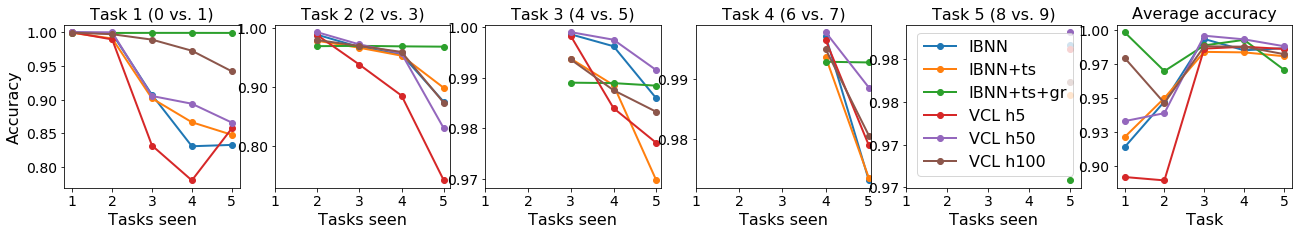

In [182]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN+ts', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_gr_acc[:, i]))+1, _ibp_ts_gr_acc[:, i], label='IBNN+ts+gr', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN+ts', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_gr_acc))+1, __ibp_ts_gr_acc, label='IBNN+ts+gr', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_ibp_normal_mh_l1.pdf", bbox_inches='tight')
fig.show()

In [183]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP+ts: {0} pm {1}".format(np.nanmean(ibp_ts_acc), np.nanmean(np.nanstd(ibp_ts_acc, 0))))
print("Overall accuracies IBP+ts+gr: {0} pm {1}".format(np.nanmean(ibp_ts_gr_acc), np.nanmean(np.nanstd(ibp_ts_gr_acc, 0))))
print("Overall accuracies IBP beta: {0} pm {1}".format(np.nanmean(ibp_acc_beta), np.nanmean(np.nanstd(ibp_acc_beta, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9529757520416159 pm 0.01958514019416123
Overall accuracies IBP+ts: 0.953637415766716 pm 0.0033875556786854945
Overall accuracies IBP+ts+gr: 0.9863347956339518 pm 0.0019741723599680672
Overall accuracies IBP beta: 0.884282915093735 pm 0.0175641350437863
Overall accuracies VCL h5: 0.9290287832382954 pm 0.043092013306687174
Overall accuracies VCL h50: 0.9587795277649633 pm 0.03920355019857497
Overall accuracies VCL h100: 0.9736987199767743 pm 0.009296121514490423


In [34]:
(0.9736987199767743-0.9290287832382954)*100

4.4669936738478855

In [42]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

In [176]:
Z_ibp = d['Z']
len(Z_ibp)

5

In [177]:
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [178]:
len(_Z_ibp)

5

In [179]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2115, 100)

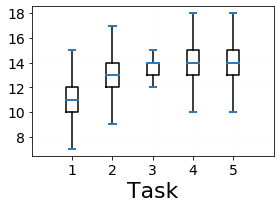

In [114]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_normal_ibp.pdf', bbox_inches='tight')
plt.show()

## CL2 new

In [184]:
with open('results/split_mnist_split_normal_l1_mh_cl2.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [185]:
with open('results/split_mnist_smnist_cl2_no_gr_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [186]:
with open('results/split_mnist_smnist_cl2_ts_.pkl', 'rb') as input_file:
    d_ts_gr = pickle.load(input_file)
d_ts_gr.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [187]:
d_ts['vcl_ibp'][1,0,:,:]

array([[0.99848805,        nan,        nan,        nan,        nan],
       [0.98577666, 0.98028993,        nan,        nan,        nan],
       [0.87434283, 0.97054039, 0.9925484 ,        nan,        nan],
       [0.83087776, 0.96692159, 0.9885949 , 0.99418457,        nan],
       [0.8200046 , 0.59185691, 0.97896062, 0.97714281, 0.98255379]])

In [ ]:
d_ts['vcl_ibp'][1,0,:,:]

In [191]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_ts_acc = d_ts['vcl_ibp'][1, :, :, :] # 1, 5, 5
ibp_ts_gr_acc = d_ts_gr['vcl_ibp'][1, :, :, :] # 1, 5, 5
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_ibp_ts_gr_acc = np.mean(ibp_ts_gr_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__ibp_ts_gr_acc = np.nanmean(ibp_ts_gr_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

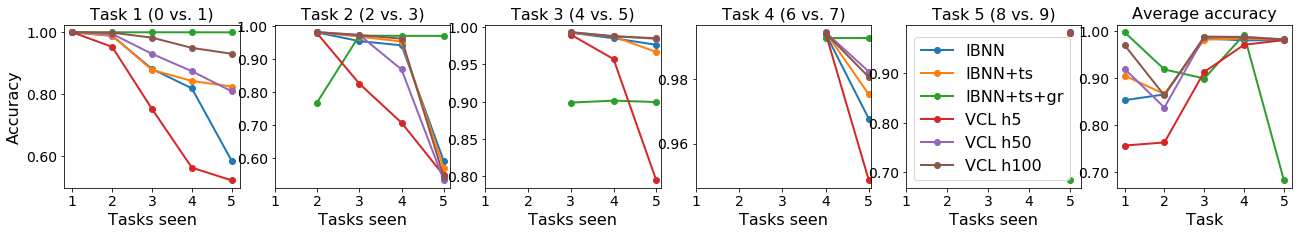

In [192]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN+ts', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_gr_acc[:, i]))+1, _ibp_ts_gr_acc[:, i], label='IBNN+ts+gr', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN+ts', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_gr_acc))+1, __ibp_ts_gr_acc, label='IBNN+ts+gr', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_normal_ibp_sh_l1.pdf", bbox_inches='tight')
fig.show()

In [193]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP+ts: {0} pm {1}".format(np.nanmean(ibp_ts_acc), np.nanmean(np.nanstd(ibp_ts_acc, 0))))
print("Overall accuracies IBP+ts+gr: {0} pm {1}".format(np.nanmean(ibp_ts_gr_acc), np.nanmean(np.nanstd(ibp_ts_gr_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9085981832471574 pm 0.022515756109213293
Overall accuracies IBP+ts: 0.926330226798621 pm 0.0052754870253718614
Overall accuracies IBP+ts+gr: 0.9357274099611281 pm 0.05475153740860233
Overall accuracies VCL h5: 0.8337444028638112 pm 0.06934054744513062
Overall accuracies VCL h50: 0.9253619673649227 pm 0.035361832779875466
Overall accuracies VCL h100: 0.9489312580437612 pm 0.012520291380895058


In [44]:
(0.9489312580437612 - 0.9085981832471574)*100

4.033307479660387

In [206]:
mu, sd = zip(*d_ts['uncerts_ibp'][0][1])
print(mu)
print(sd)

(0.19105518, 0.48405132, 0.53463095, 0.42072642)
(0.34150398, 0.28946427, 0.40770188, 0.33528352)


In [230]:
mu, sd = zip(*d_ts['uncerts_ibp'][1][1])
print(mu)
print(sd)

(0.13799606, 0.43898302, 0.44959682, 0.32616696)
(0.26549268, 0.21676193, 0.37256938, 0.2424721)


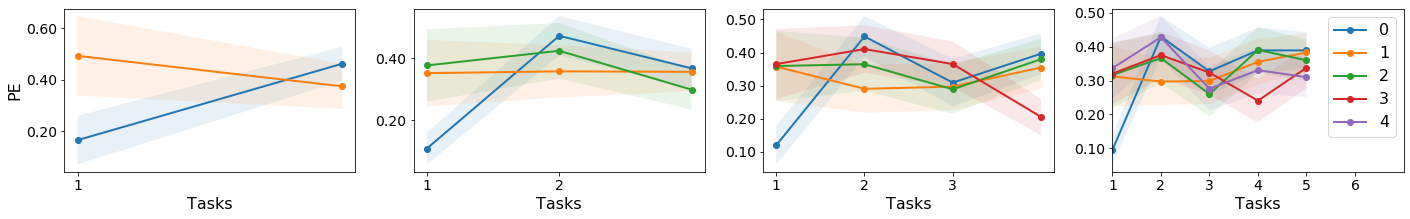

In [244]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

runs=2
no_tasks=5
fig, ax = plt.subplots(1, 4, figsize=(24, 3))
for i in range(no_tasks-1):
    task = i+1
    num_heads = task+1
    mus, sds = np.zeros((runs, (task+1)*num_heads)), np.zeros((runs, (task+1)*num_heads))
    for r in range(runs):
        uncert = d_ts['uncerts_ibp'][r]
        mu, sd = zip(*uncert[task])
        mus[r, :] = mu
        sds[r, :] = sd
    _mu = np.mean(mus, 0)
    _sd = np.mean(sds**2 + mus**2, 0) - _mu**2
    for j in range(num_heads):
        start = j*num_heads
        end = (j+1)*num_heads
        ax[i].plot(np.arange(num_heads)+1, _mu[start:end], label=str(j), marker='o', linewidth=lw)
        ax[i].fill_between(np.arange(num_heads)+1, [m+s for m, s in zip(_mu[start:end], _sd[start:end])], [m-s for m, s in zip(_mu[start:end], _sd[start:end])], alpha=0.1)
    ax[i].set_xticks(range(1, num_heads))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 3:
        ax[i].set_xticks(range(1, num_heads+2))
        ax[i].set_xlim((1, 7))
        ax[i].legend(fontsize=legend_size, loc='upper right')
    if i == 0:
        ax[i].set_ylabel('PE', fontsize=legend_size)
#plt.savefig("plots/vvv.pdf", bbox_inches='tight')
fig.show()

## CL3

In [301]:
with open('../ddm/results/split_mnist_split_normal_l1_cl3.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

FileNotFoundError: [Errno 2] No such file or directory: '../ddm/results/split_mnist_split_normal_l1_cl3.pkl'

In [303]:
with open('results/split_mnist_smnist_cl3_ts_.pkl', 'rb') as input_file:
    d_ts_gr = pickle.load(input_file)
d_ts_gr.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [304]:
with open('results/split_mnist_smnist_cl3_no_gr_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [305]:
ibp_ts_acc = d_ts['vcl_ibp'][1,:,:,:]
ibp_ts_gr_acc = d_ts_gr['vcl_ibp'][1,:,:,:]
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_ibp_ts_gr_acc = np.mean(ibp_ts_gr_acc, 0)
__ibp_ts_plus_acc = np.nanmean(ibp_ts_plus_acc, (0,1))
__ibp_ts_gr_acc = np.nanmean(ibp_ts_gr_acc, (0,1))

In [2]:
ibp_acc = d['vcl_ibp']
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

NameError: name 'd' is not defined

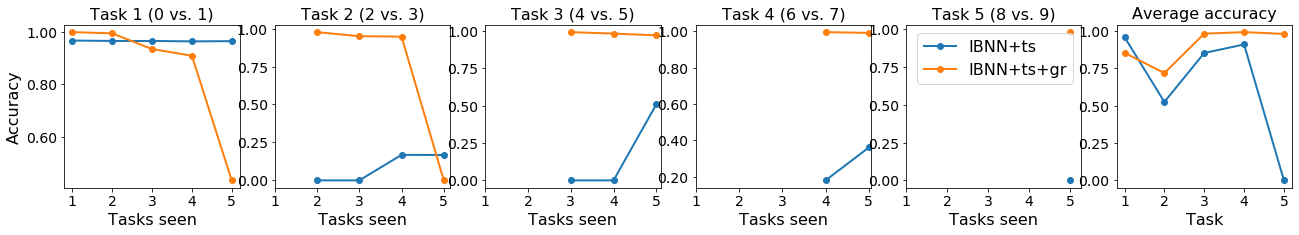

In [306]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN+ts', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_gr_acc[:, i]))+1, _ibp_ts_gr_acc[:, i], label='IBNN+ts+gr', marker='o', linewidth=lw)
#     ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
#     ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
#     ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN+ts', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_gr_acc))+1, __ibp_ts_gr_acc, label='IBNN+ts+gr', marker='o', linewidth=lw)
# ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
# ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
# ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_mh_l1.pdf", bbox_inches='tight')
fig.show()

In [5]:
print("Overall accuracies IBP: {0:.1f} pm {1:.1f}".format(np.nanmean(ibp_acc)*100, np.nanmean(np.nanstd(ibp_acc, 0))*100))
print("Overall accuracies VCL h5: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h5)*100, np.nanmean(np.nanstd(vcl_result_h5, 0))*100))
print("Overall accuracies VCL h50: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h50)*100, np.nanmean(np.nanstd(vcl_result_h50, 0))*100))
print("Overall accuracies VCL h100: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h100)*100, np.nanmean(np.nanstd(vcl_result_h100, 0))*100))

Overall accuracies IBP: 17.5 pm 4.2
Overall accuracies VCL h5: 16.5 pm 4.3
Overall accuracies VCL h50: 20.2 pm 6.6
Overall accuracies VCL h100: 19.5 pm 6.6


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [54]:
print("Overall accuracies IBP: {0:.1f} pm {1:.1f}".format(np.nanmean(ibp_acc)*100, np.nanmean(np.nanstd(ibp_acc, 0))*100))
print("Overall accuracies VCL h5: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h5)*100, np.nanmean(np.nanstd(vcl_result_h5, 0))*100))
print("Overall accuracies VCL h50: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h50)*100, np.nanmean(np.nanstd(vcl_result_h50, 0))*100))
print("Overall accuracies VCL h100: {0:.1f} pm {1:.1f}".format(np.nanmean(vcl_result_h100)*100, np.nanmean(np.nanstd(vcl_result_h100, 0))*100))

Overall accuracies IBP: 85.5 pm 3.2
Overall accuracies VCL h5: 72.2 pm 12.2
Overall accuracies VCL h50: 91.0 pm 5.6
Overall accuracies VCL h100: 96.3 pm 3.0


In [307]:
print("Overall accuracies IBP+ts: {0:.1f} pm {1:.1f}".format(np.nanmean(ibp_ts_acc)*100, np.nanmean(np.nanstd(ibp_ts_acc, 0))*100))
print("Overall accuracies IBP+ts+gr: {0:.1f} pm {1:.1f}".format(np.nanmean(ibp_ts_gr_acc)*100, np.nanmean(np.nanstd(ibp_ts_gr_acc, 0))*100))

Overall accuracies IBP+ts: 41.4 pm 12.7
Overall accuracies IBP+ts+gr: 87.0 pm 3.2


TypeError: zip argument #1 must support iteration

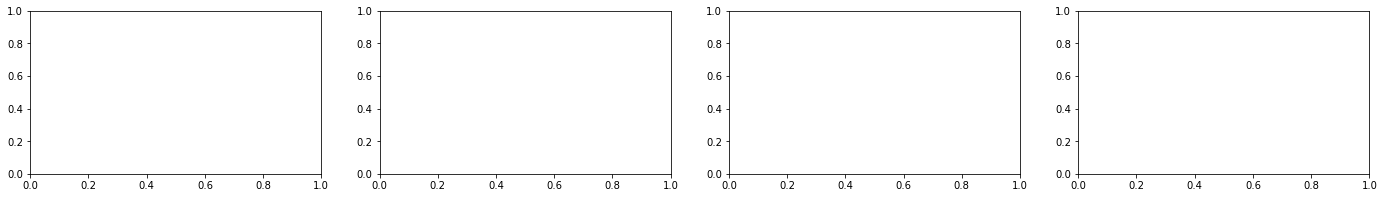

In [308]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

runs=2
no_tasks=5
fig, ax = plt.subplots(1, 4, figsize=(24, 3))
for i in range(no_tasks-1):
    task = i+1
    num_heads = task+1
    mus, sds = np.zeros((runs, (task+1)*num_heads)), np.zeros((runs, (task+1)*num_heads))
    for r in range(runs):
        uncert = d_ts['uncerts_ibp'][r]
        mu, sd = zip(*uncert[task])
        mus[r, :] = mu
        sds[r, :] = sd
    _mu = np.mean(mus, 0)
    _sd = np.mean(sds**2 + mus**2, 0) - _mu**2
    for j in range(num_heads):
        start = j*num_heads
        end = (j+1)*num_heads
        ax[i].plot(np.arange(num_heads)+1, _mu[start:end], label=str(j), marker='o', linewidth=lw)
        ax[i].fill_between(np.arange(num_heads)+1, [m+s for m, s in zip(_mu[start:end], _sd[start:end])], [m-s for m, s in zip(_mu[start:end], _sd[start:end])], alpha=0.1)
    ax[i].set_xticks(range(1, num_heads))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    ax[i].set_ylim((0.1, 0.6))
    if i == 3:
        ax[i].set_xticks(range(1, num_heads+2))
        ax[i].set_xlim((1, 7))
        ax[i].legend(fontsize=legend_size, loc='upper right')
    if i == 0:
        ax[i].set_ylabel('PE', fontsize=legend_size)
#plt.savefig("plots/vvv.pdf", bbox_inches='tight')
fig.show()

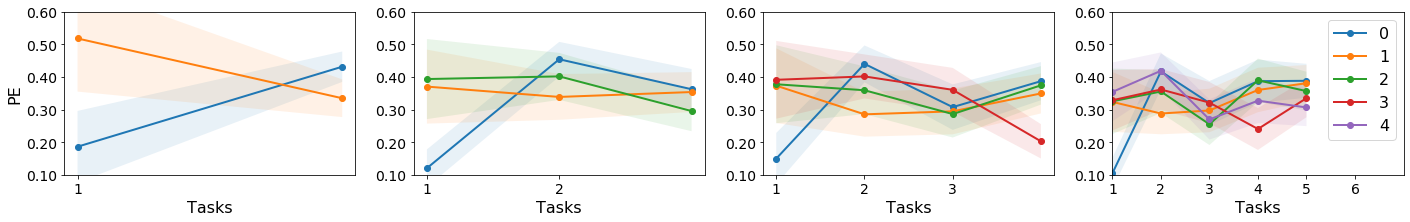

In [279]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

runs=2
no_tasks=5
fig, ax = plt.subplots(1, 4, figsize=(24, 3))
for i in range(no_tasks-1):
    task = i+1
    num_heads = task+1
    mus, sds = np.zeros((runs, (task+1)*num_heads)), np.zeros((runs, (task+1)*num_heads))
    for r in range(runs):
        uncert = d_ts_plus['uncerts_ibp'][r]
        mu, sd = zip(*uncert[task])
        mus[r, :] = mu
        sds[r, :] = sd
    _mu = np.mean(mus, 0)
    _sd = np.mean(sds**2 + mus**2, 0) - _mu**2
    for j in range(num_heads):
        start = j*num_heads
        end = (j+1)*num_heads
        ax[i].plot(np.arange(num_heads)+1, _mu[start:end], label=str(j), marker='o', linewidth=lw)
        ax[i].fill_between(np.arange(num_heads)+1, [m+s for m, s in zip(_mu[start:end], _sd[start:end])], [m-s for m, s in zip(_mu[start:end], _sd[start:end])], alpha=0.1)
    ax[i].set_xticks(range(1, num_heads))
    ax[i].set_ylim((0.1, 0.6))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 3:
        ax[i].set_xticks(range(1, num_heads+2))
        ax[i].set_xlim((1, 7))
        ax[i].legend(fontsize=legend_size, loc='upper right')
    if i == 0:
        ax[i].set_ylabel('PE', fontsize=legend_size)
#plt.savefig("plots/vvv.pdf", bbox_inches='tight')
fig.show()

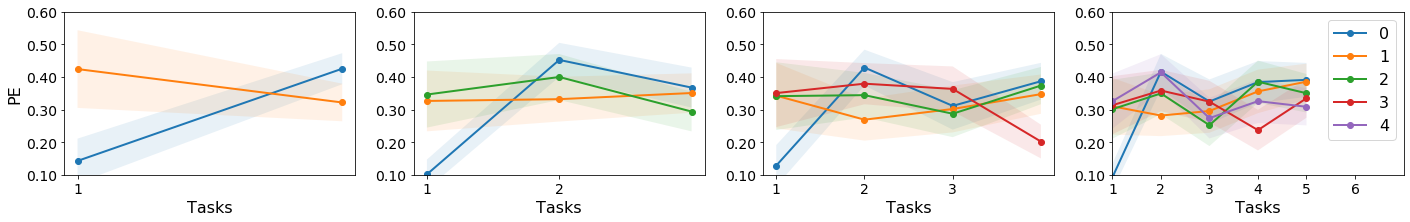

In [283]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

runs=2
no_tasks=5
fig, ax = plt.subplots(1, 4, figsize=(24, 3))
for i in range(no_tasks-1):
    task = i+1
    num_heads = task+1
    mus, sds = np.zeros((runs, (task+1)*num_heads)), np.zeros((runs, (task+1)*num_heads))
    for r in range(runs):
        uncert = d_ts_plus_c02['uncerts_ibp'][r]
        mu, sd = zip(*uncert[task])
        mus[r, :] = mu
        sds[r, :] = sd
    _mu = np.mean(mus, 0)
    _sd = np.mean(sds**2 + mus**2, 0) - _mu**2
    for j in range(num_heads):
        start = j*num_heads
        end = (j+1)*num_heads
        ax[i].plot(np.arange(num_heads)+1, _mu[start:end], label=str(j), marker='o', linewidth=lw)
        ax[i].fill_between(np.arange(num_heads)+1, [m+s for m, s in zip(_mu[start:end], _sd[start:end])], [m-s for m, s in zip(_mu[start:end], _sd[start:end])], alpha=0.1)
    ax[i].set_xticks(range(1, num_heads))
    ax[i].set_ylim((0.1, 0.6))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 3:
        ax[i].set_xticks(range(1, num_heads+2))
        ax[i].set_xlim((1, 7))
        ax[i].legend(fontsize=legend_size, loc='upper right')
    if i == 0:
        ax[i].set_ylabel('PE', fontsize=legend_size)
#plt.savefig("plots/vvv.pdf", bbox_inches='tight')
fig.show()

# IBP random

In [60]:
with open('../ddm/results/split_mnist_res5_random_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [61]:
with open('../ddm/results/split_mnist_res5_ibp_rs_split_random_noise_rs_l1_mh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
d_rs.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'opt_params'])

In [69]:
with open('../ddm/results/split_mnist_res5_split_mnist_random_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [70]:
with open('results/split_mnist_srmnist_cl2_ts_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [76]:
d_ts['vcl_ibp'].shape

(2, 5, 5, 5)

In [71]:
d_rs['opt_params']

{'learning_rate': 0.0008335670858067363,
 'alpha0': 41.35960872383244,
 'lambda_1': 0.8727902595597832,
 'lambda_2': 0.884473036312595,
 'prior_var': 0.2004417949743666,
 'alpha': 11.589043508692054,
 'ibp_samples': 10.0,
 'no_pred_samples': 10.0,
 'prior_mean': 0.0,
 'batch_size': 128.0,
 'beta0': 1.0}

In [72]:
ibp_acc_rs = d_rs['vcl_ibp']
print("Overall accuracies IBP RS: {0} pm {1}".format(np.nanmean(ibp_acc_rs), np.nanmean(np.nanstd(ibp_acc_rs, 0))))

Overall accuracies IBP RS: 0.9166935581763584 pm 0.018938228680493146


In [73]:
with open('../ddm/results/split_mnist_res5_split_random.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50'])

In [77]:
ibp_acc = d['vcl_ibp']
ibp_ts_acc = d_ts['vcl_ibp'][0,:,:,:]
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

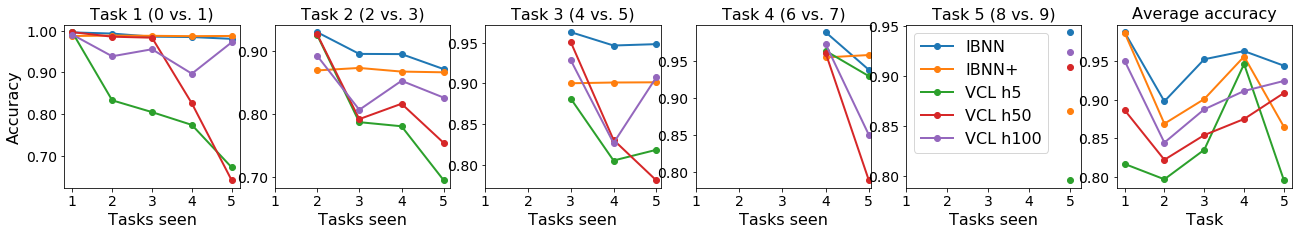

In [78]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN+', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN +', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_mh_l1.pdf", bbox_inches='tight')
fig.show()

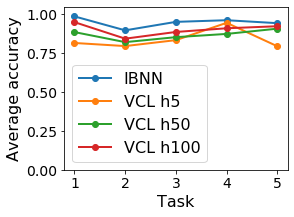

In [191]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax.plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax.set_xticks(range(1, len(__ibp_acc)+1))
ax.set_ylabel('Average accuracy', fontsize=legend_size)
ax.set_xlabel('Task', fontsize=legend_size)
ax.set_ylim(0.0, 1.05)
ax.tick_params(labelsize=tick_size)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.legend(fontsize=legend_size, loc= 'lower left')
plt.savefig("plots/av_acc_ibp_split_mnist_mh.pdf", bbox_inches='tight')
fig.show()

In [79]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP +: {0} pm {1}".format(np.nanmean(ibp_ts_acc), np.nanmean(np.nanstd(ibp_ts_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9505302564897856 pm 0.010747197352811237
Overall accuracies IBP +: 0.9260395476818085 pm 0.00712352426616262
Overall accuracies VCL h5: 0.8307996569750435 pm 0.07423431095048376
Overall accuracies VCL h50: 0.8627729046356846 pm 0.05088350271217945
Overall accuracies VCL h100: 0.9026689988871416 pm 0.03195987639252343


In [35]:
(0.9026689988871416-0.8307996569750435)*100

7.186934191209804

In [201]:
Z_ibp = d['Z']
len(Z_ibp)

5

In [202]:
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [203]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

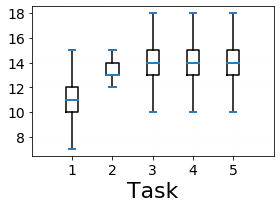

In [204]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.8)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.8)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_random_ibp_mh.pdf', bbox_inches='tight')
plt.show()

# CL2

In [81]:
with open('results/split_mnist_random_mh_cl2.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [82]:
with open('results/split_mnist_srmnist_cl2_ts_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [83]:
ibp_acc = d['vcl_ibp']
ibp_ts_acc = d_ts['vcl_ibp'][1,:,:,:]
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

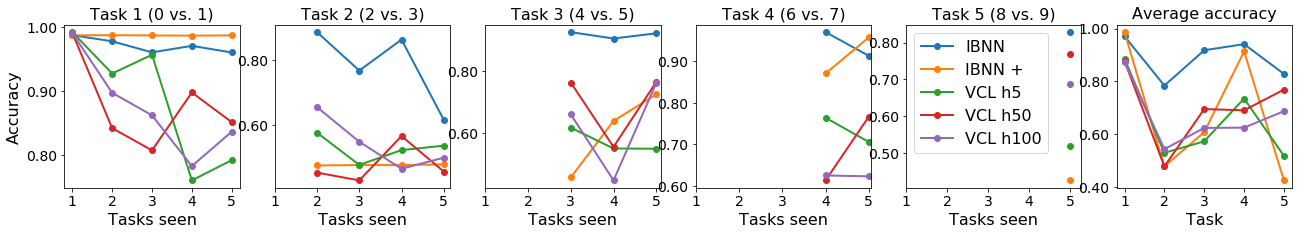

In [84]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN +', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN +', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [85]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP +: {0} pm {1}".format(np.nanmean(ibp_ts_acc), np.nanmean(np.nanstd(ibp_ts_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.8967874238709744 pm 0.038106379056498704
Overall accuracies IBP +: 0.7279709171007077 pm 0.04471780985121947
Overall accuracies VCL h5: 0.6833608195851343 pm 0.13917403519887123
Overall accuracies VCL h50: 0.7021409947946 pm 0.1313745832094058
Overall accuracies VCL h100: 0.6898106963633052 pm 0.13815229541301707


In [29]:
(0.7021409947946-0.6833608195851343)*100

1.8780175209465733

In [11]:
Z_ibp = d['Z']
num_layers=1
num_tasks=5
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

In [15]:
##### Box plot params
grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 1
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

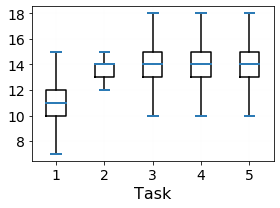

In [16]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.8)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_bp_random_ibp_sh.pdf', bbox_inches='tight')
plt.show()

## CL3

In [86]:
with open('results/split_mnist_split_random_l1_cl3_opt.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [87]:
with open('results/split_mnist_srmnist_cl3_ts_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [90]:
ibp_acc = d['vcl_ibp']
ibp_ts_acc = d_ts['vcl_ibp'][1,:,:,:]
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

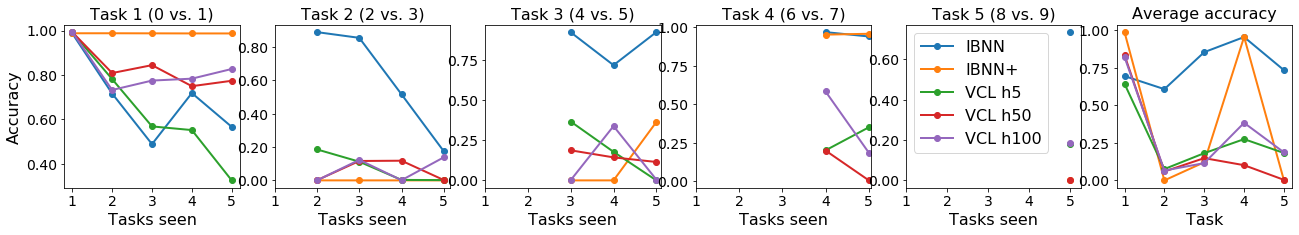

In [91]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN+', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN+', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

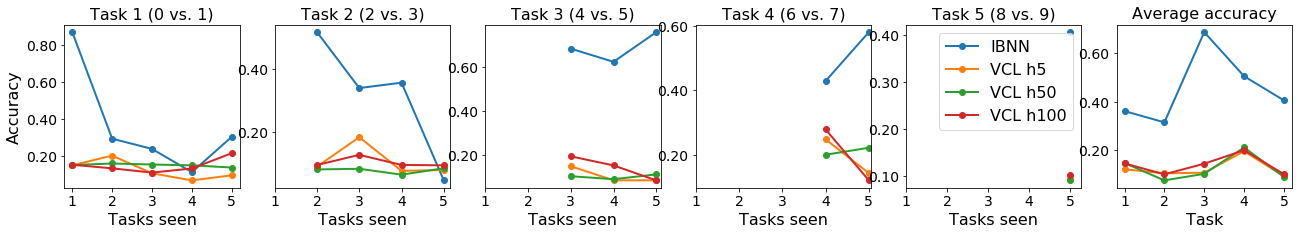

In [8]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_random_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [92]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP+: {0} pm {1}".format(np.nanmean(ibp_ts_acc), np.nanmean(np.nanstd(ibp_ts_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.7405325257093176 pm 0.21010784824466885
Overall accuracies IBP+: 0.4806531140932454 pm 0.030711499217141343
Overall accuracies VCL h5: 0.31952059388593973 pm 0.2638550379990343
Overall accuracies VCL h50: 0.3369913779180637 pm 0.19169509098757573
Overall accuracies VCL h100: 0.37787716544062466 pm 0.18909482847032638


In [7]:
print("Overall accuracies IBP: {0} pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.41365049951873517 pm 0.0
Overall accuracies VCL h5: 0.15490565335012907 pm 0.0
Overall accuracies VCL h50: 0.11812884692298449 pm 0.0
Overall accuracies VCL h100: 0.09608922851144734 pm 0.0


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [35]:
(0.4214419163900301-0.3553104078914254)*100

6.613150849860472

# Image MNIST

# CL1

In [126]:
with open('../ddm/results/split_mnist_res5_background_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [127]:
#split_mnist_res5_split_background.pkl
with open('../ddm/results/split_mnist_res5_split_background.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50'])

In [128]:
#split_mnist_res5_split_background.pkl
with open('../ddm/results/split_mnist_res5_split_mnist_bck_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [129]:
#split_mnist_res5_split_background.pkl
with open('results/split_mnist_simnist_cl2_ts_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [130]:
#split_mnist_res5_split_background.pkl
with open('results/split_mnist_simnist_no_sg_cl2_.pkl', 'rb') as input_file:
    d_ts_no_sg = pickle.load(input_file)
d_ts_no_sg.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [131]:
d_ts_no_sg['vcl_ibp'].shape

(2, 1, 5, 5)

In [132]:
ibp_acc = d['vcl_ibp']
ibp_ts_acc = d_ts['vcl_ibp'][0, :, :, :]
ibp_ts_no_sg_acc = d_ts_no_sg['vcl_ibp'][0, :, :, :]
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

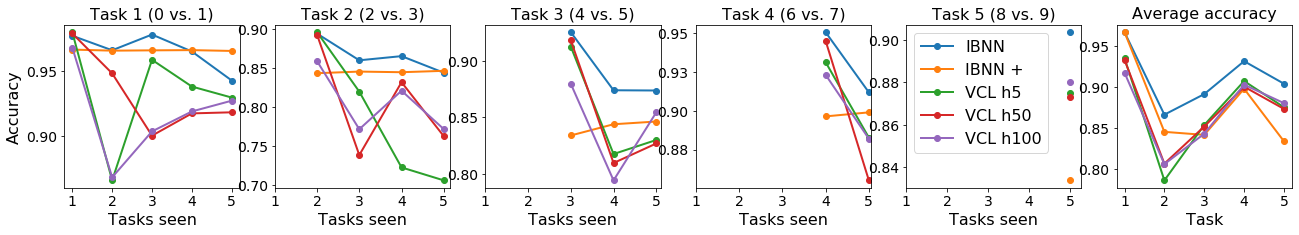

In [46]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN +', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size, loc='upper left')
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN +', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_background_l1_mh.pdf", bbox_inches='tight')
fig.show()

In [133]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP +: {0}, pm {1}".format(np.nanmean(ibp_ts_acc), np.nanmean(np.nanstd(ibp_ts_acc, 0))))
print("Overall accuracies IBP + no sg: {0}, pm {1}".format(np.nanmean(ibp_ts_no_sg_acc), np.nanmean(np.nanstd(ibp_ts_no_sg_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9156278702278187, pm 0.012168977335323591
Overall accuracies IBP +: 0.891063390135765, pm 0.007982993882930018
Overall accuracies IBP + no sg: 0.8966671079397202, pm 0.0
Overall accuracies VCL h5: 0.8711126943116426 pm 0.04459472381145026
Overall accuracies VCL h50: 0.8745120741837208 pm 0.03588567768291211
Overall accuracies VCL h100: 0.8681924813288489 pm 0.03162752898764158


In [36]:
(0.8745120741837208-0.8681924813288489)*100

0.6319592854871936

In [192]:
Z_ibp = d['Z']
len(Z_ibp[0])

5

In [193]:
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2126, 100)

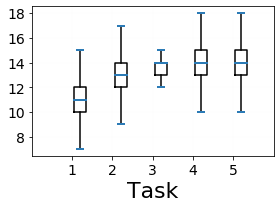

In [195]:
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_background_ibp_mh.pdf', bbox_inches='tight')
plt.show()

# CL2

In [136]:
with open('results/split_mnist_background_mh_cl2.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [137]:
with open('results/split_mnist_simnist_cl2_ts_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [138]:
#split_mnist_res5_split_background.pkl
with open('results/split_mnist_simnist_no_sg_cl2_.pkl', 'rb') as input_file:
    d_ts_no_sg = pickle.load(input_file)
d_ts_no_sg.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [139]:
ibp_acc = d['vcl_ibp']
ibp_ts_acc = d_ts['vcl_ibp'][1, :, :, :]
ibp_ts_no_sg_acc = d_ts_no_sg['vcl_ibp'][1, :, :, :]
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

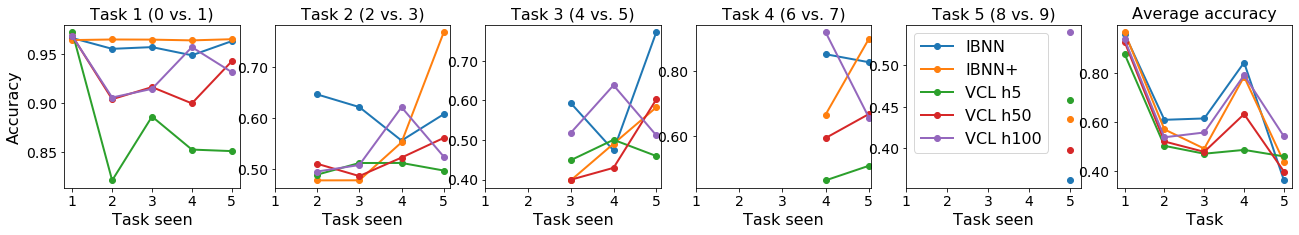

In [51]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN+', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Task seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN+', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_background_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [140]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP +: {0}, pm {1}".format(np.nanmean(ibp_ts_acc), np.nanmean(np.nanstd(ibp_ts_acc, 0))))
print("Overall accuracies IBP + no sg: {0}, pm {1}".format(np.nanmean(ibp_ts_no_sg_acc), np.nanmean(np.nanstd(ibp_ts_no_sg_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.7403616925211611, pm 0.12607677909479
Overall accuracies IBP +: 0.7048540745697965, pm 0.06134938986237976
Overall accuracies IBP + no sg: 0.7457091058483896, pm 0.0
Overall accuracies VCL h5: 0.6150841934315878 pm 0.07051731847188535
Overall accuracies VCL h50: 0.6532656950679017 pm 0.07508571211125824
Overall accuracies VCL h100: 0.7073929917929799 pm 0.0948821966087831


In [40]:
(0.7073929917929799 - 0.6150841934315878)*100

9.230879836139206

## CL3

In [317]:
with open('results/split_mnist_split_images_l1_cl3.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [318]:
with open('results/split_mnist_simnist_cl3_ts_.pkl', 'rb') as input_file:
    d_ts_gr = pickle.load(input_file)
d_ts_gr.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [319]:
with open('results/split_mnist_simnist_cl3_ts_no_gr_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [320]:
with open('results/split_mnist_simnist_cl3_ts_e1000_.pkl', 'rb') as input_file:
    d_e1000 = pickle.load(input_file)
d_e1000.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [321]:
with open('results/split_mnist_simnist_cl3_ts_sg_.pkl', 'rb') as input_file:
    d_ts_gr_n = pickle.load(input_file)
d_ts_gr_n.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z', 'ts'])

In [327]:
ibp_acc = d['vcl_ibp']
ibp_ts_acc = d_ts['vcl_ibp'][1,:,:,:]
ibp_ts_gr_acc = d_ts_gr['vcl_ibp'][1,:,:,:]
ibp_ts_e1000_acc = d_e1000['vcl_ibp'][1,:,:,:]
ibp_ts_gr_n_acc = d_ts_gr_n['vcl_ibp'][1,:,:,:]
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_ibp_ts_gr_acc = np.mean(ibp_ts_gr_acc, 0)
_ibp_ts_e1000_acc = np.mean(ibp_ts_e1000_acc, 0)
_ibp_ts_gr_n_acc = np.mean(ibp_ts_gr_n_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__ibp_ts_gr_acc = np.nanmean(ibp_ts_gr_acc, (0,1))
__ibp_ts_e1000_acc = np.nanmean(ibp_ts_e1000_acc, (0,1))
__ibp_ts_gr_n_acc = np.nanmean(ibp_ts_gr_n_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

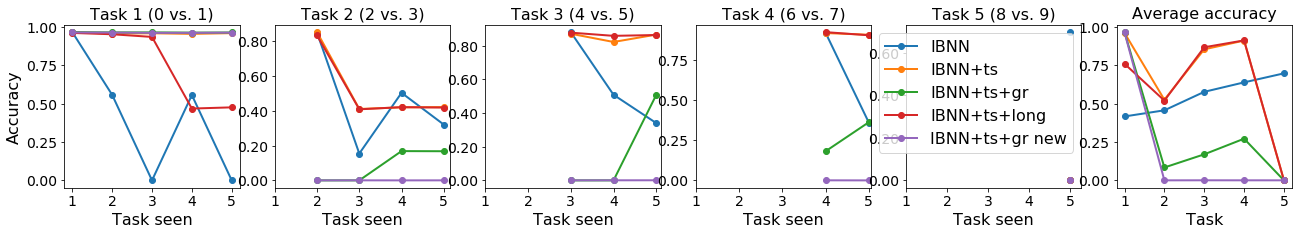

In [328]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN+ts', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_gr_acc[:, i]))+1, _ibp_ts_gr_acc[:, i], label='IBNN+ts+gr', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_e1000_acc[:, i]))+1, _ibp_ts_e1000_acc[:, i], label='IBNN+ts+long', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_gr_n_acc[:, i]))+1, _ibp_ts_gr_n_acc[:, i], label='IBNN+ts+gr new', marker='o', linewidth=lw)
    #ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    #ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    #ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Task seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN+ts', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_gr_acc))+1, __ibp_ts_gr_acc, label='IBNN+ts+gr', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_e1000_acc))+1, __ibp_ts_e1000_acc, label='IBNN+ts+long', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_gr_n_acc))+1, __ibp_ts_gr_n_acc, label='IBNN+ts+gr new', marker='o', linewidth=lw)
#ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
#ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
#ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_background_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [329]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP+ts: {0}, pm {1}".format(np.nanmean(ibp_ts_acc), np.nanmean(np.nanstd(ibp_ts_acc, 0))))
print("Overall accuracies IBP+ts+gr: {0}, pm {1}".format(np.nanmean(ibp_ts_gr_acc), np.nanmean(np.nanstd(ibp_ts_gr_acc, 0))))
print("Overall accuracies IBP+ts long: {0}, pm {1}".format(np.nanmean(ibp_ts_e1000_acc), np.nanmean(np.nanstd(ibp_ts_e1000_acc, 0))))
print("Overall accuracies IBP+ts+gr new: {0}, pm {1}".format(np.nanmean(ibp_ts_gr_n_acc), np.nanmean(np.nanstd(ibp_ts_gr_n_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.5070569855664688, pm 0.24343779016673878
Overall accuracies IBP+ts: 0.7517234304638649, pm 0.08626879276189797
Overall accuracies IBP+ts+gr: 0.4140795271490775, pm 0.12661669867297776
Overall accuracies IBP+ts long: 0.686168154674807, pm 0.15172615505766765
Overall accuracies IBP+ts+gr new: 0.32136585956867186, pm 0.0008606118072381039
Overall accuracies VCL h5: 0.33976264140823903 pm 0.2873360507593198
Overall accuracies VCL h50: 0.5601507341564663 pm 0.24603061346529154
Overall accuracies VCL h100: 0.66072359438378 pm 0.20732530576630487


In [45]:
(0.66072359438378- 0.33976264140823903)*100

32.0960952975541

## Permuted MNIST

In [141]:
with open('../ddm/results/permuted_mnist_res5_perm_l1_mh_new.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [142]:
with open('../ddm/results/permuted_mnist_res5_perm_l1_mh.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [143]:
with open('../ddm/results/permuted_mnist_res5_perm_mh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [144]:
Z_ibp = d['Z']
[item.shape for item in Z_ibp[4]]

[(1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100)]

In [145]:
with open('results/permuted_mnist_perm_cl2_ts_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [146]:
d_ts['vcl_ibp'].shape

(2, 2, 5, 5)

In [147]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_ts_acc = d_ts['vcl_ibp'][0,:,:,:] # 5, 5, 5
vcl_result_h5 = d_baselines['vcl_baselines'][5]
vcl_result_h50 = d_baselines['vcl_baselines'][50]
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

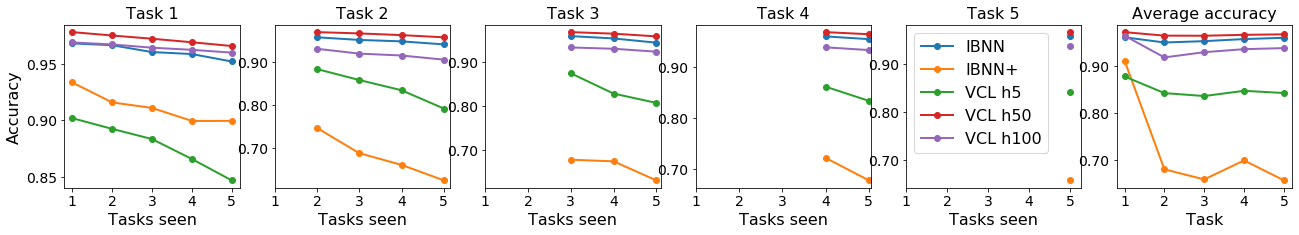

In [148]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN+', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN+', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_ibp_perm_mh_all.pdf", bbox_inches='tight')
fig.show()

In [417]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9560959999999998, pm 0.002011861533081928
Overall accuracies VCL h5: 0.8540106666666666 pm 0.009992434791613429
Overall accuracies VCL h50: 0.967593333333333 pm 0.0013626490255064343
Overall accuracies VCL h100: 0.9397761208598625 pm 0.0017017417870295428


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [341]:
Z_ibp = d['Z']
[item.shape for item in Z_ibp[1]]

[(1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100)]

In [342]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [343]:
__Z_ibp[0].shape

(50000, 100)

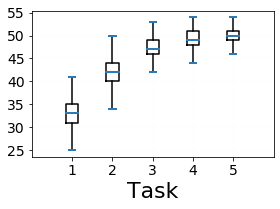

In [89]:
plt.figure(figsize=fig_size)
grid_color = '0.1'
grid_lw = 0.2

if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_perm_mh_ibp.pdf', bbox_inches='tight')
plt.show()

/nfs/home/samuelk/IBP_BNN/ddm/visualise.py:130: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


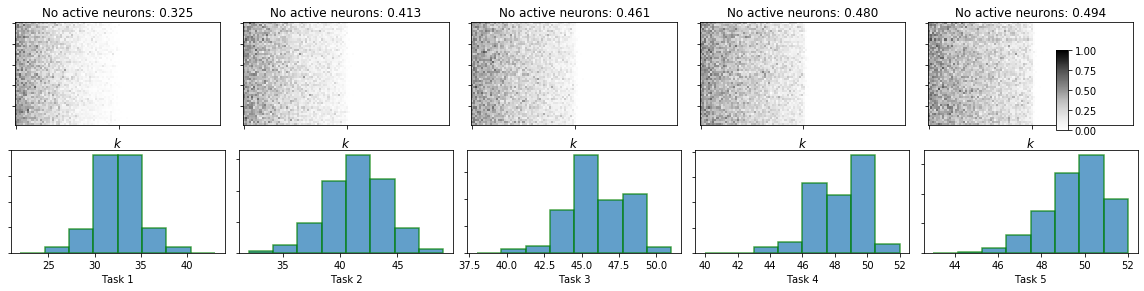

In [68]:
from visualise import plot_Zs
num_layers=1
Zs=Z_ibp[1]
dataset='perm'
tag='cl1'
plot_Zs(num_tasks, num_layers, Zs, dataset, tag)

# t10

In [3]:
with open('results/permuted_mnist_perm_ibp_t10_cl2.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [4]:
d['vcl_ibp'].shape

(2, 5, 10, 10)

In [6]:
d['vcl_baselines'].keys()

dict_keys([5, 50, 100])

In [7]:
cl2 = True
ind = 0 if cl2 else 1
ibp_acc = d['vcl_ibp'][ind,:,:,:] # 5, 10, 10
vcl_result_h5 = d['vcl_baselines'][5][ind,:,:,:]
vcl_result_h50 = d['vcl_baselines'][50][ind,:,:,:]
vcl_result_h100 = d['vcl_baselines'][100][ind,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

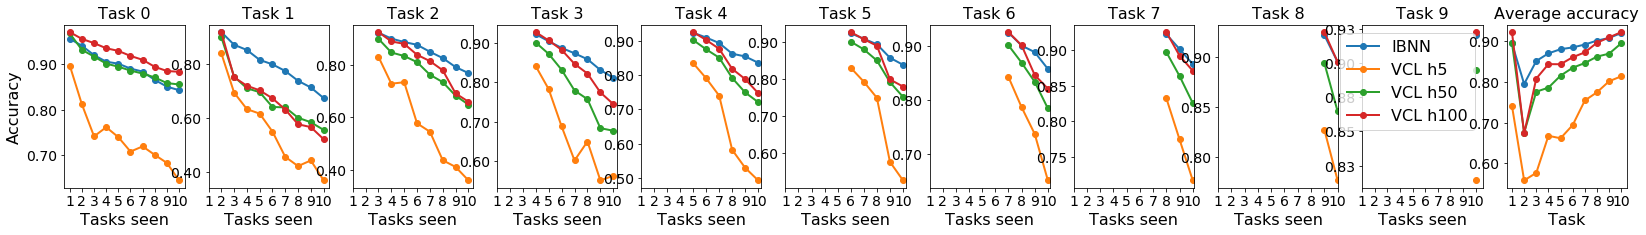

In [11]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
 
no_tasks=10
titles = {i: "Task " + str(i) for i in range(no_tasks)}
fig, ax = plt.subplots(1, no_tasks+1, figsize=(28, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 9:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[no_tasks].set_xticks(range(1, len(_ibp_acc)+1))
ax[no_tasks].set_title('Average accuracy', fontsize=legend_size)
ax[no_tasks].set_xlabel('Task', fontsize=legend_size)
ax[no_tasks].tick_params(labelsize=tick_size)
ax[no_tasks].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_ibp_perm_mh_all.pdf", bbox_inches='tight')
fig.show()

In [12]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.8678949976516126, pm 0.010051295722446072
Overall accuracies VCL h5: 0.6714002410246122 pm 0.037835709730629136
Overall accuracies VCL h50: 0.8078337024435213 pm 0.019967810421931836
Overall accuracies VCL h100: 0.8354373238989344 pm 0.01865779843672655


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [23]:
(0.8354373238989344 -0.6714002410246122)*100

16.403708287432227

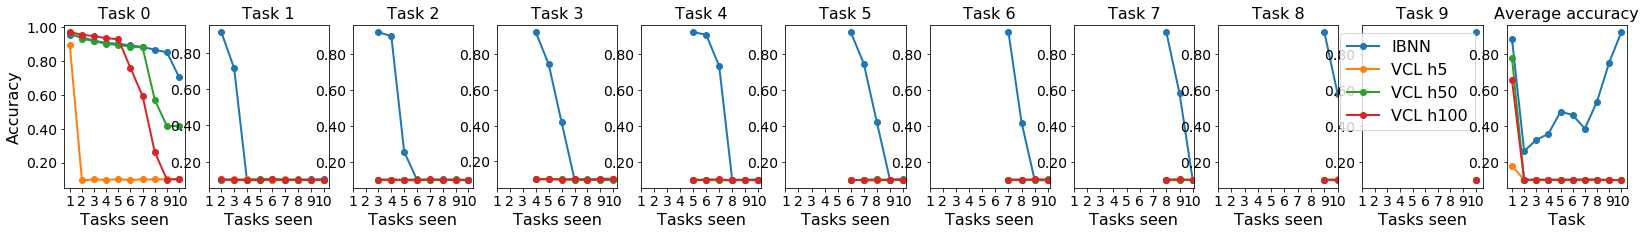

In [16]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
 
no_tasks=10
titles = {i: "Task " + str(i) for i in range(no_tasks)}
fig, ax = plt.subplots(1, no_tasks+1, figsize=(28, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 9:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[no_tasks].set_xticks(range(1, len(_ibp_acc)+1))
ax[no_tasks].set_title('Average accuracy', fontsize=legend_size)
ax[no_tasks].set_xlabel('Task', fontsize=legend_size)
ax[no_tasks].tick_params(labelsize=tick_size)
ax[no_tasks].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_ibp_perm_mh_all.pdf", bbox_inches='tight')
fig.show()

In [17]:
with open('results/permuted_mnist_perm_ibp_t10_cl3.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [18]:
d['vcl_ibp'].shape

(2, 5, 10, 10)

In [20]:
cl3 = True
ind = 1 if cl3 else 0
ibp_acc = d['vcl_ibp'][ind,:,:,:] # 5, 10, 10
vcl_result_h5 = d['vcl_baselines'][5][ind,:,:,:]
vcl_result_h50 = d['vcl_baselines'][50][ind,:,:,:]
vcl_result_h100 = d['vcl_baselines'][100][ind,:,:,:]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

In [21]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.8763462992012501, pm 0.06685576793368368
Overall accuracies VCL h5: 0.25880277094177223 pm 0.05174225063552943
Overall accuracies VCL h50: 0.2772703127224337 pm 0.0615522114805599
Overall accuracies VCL h100: 0.5199819157475775 pm 0.1329730913082454


In [24]:
(0.5199819157475775-0.25880277094177223)*100

26.117914480580524

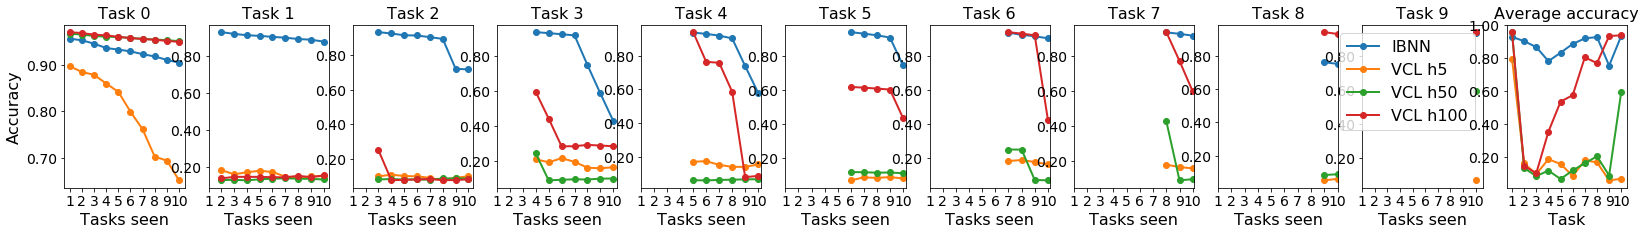

In [22]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16
 
no_tasks=10
titles = {i: "Task " + str(i) for i in range(no_tasks)}
fig, ax = plt.subplots(1, no_tasks+1, figsize=(28, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 9:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[no_tasks].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[no_tasks].set_xticks(range(1, len(_ibp_acc)+1))
ax[no_tasks].set_title('Average accuracy', fontsize=legend_size)
ax[no_tasks].set_xlabel('Task', fontsize=legend_size)
ax[no_tasks].tick_params(labelsize=tick_size)
ax[no_tasks].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_ibp_perm_mh_all.pdf", bbox_inches='tight')
fig.show()

## Variation with h

In [3]:
# permuted_mnist_res5_l1_mh_new.pkl
with open('../ddm/results/permuted_mnist_res5_l1_mh_new.pkl', 'rb') as input_file:
    d_vcl = pickle.load(input_file)
d_vcl['vcl_baselines'].keys()

dict_keys([10, 20, 100, 200, 400, 800])

In [4]:
vcl_result_h10 = d_vcl['vcl_baselines'][10]
vcl_result_h20 = d_vcl['vcl_baselines'][20]
vcl_result_h100 = d_vcl['vcl_baselines'][100]
vcl_result_h200 = d_vcl['vcl_baselines'][200]
vcl_result_h400 = d_vcl['vcl_baselines'][400]
vcl_result_h800 = d_vcl['vcl_baselines'][800]

# _ibp_acc = np.mean(ibp_acc, 0)
# _vcl_result_h5 = np.mean(vcl_result_h5, 0)
# _vcl_result_h50 = np.mean(vcl_result_h50, 0)
# _vcl_result_h100 = np.mean(vcl_result_h100, 0)
# __ibp_acc = np.nanmean(ibp_acc, (0,1))
# __vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
# __vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
# __vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

In [11]:
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h10: {0} pm {1}".format(np.nanmean(vcl_result_h10), np.nanmean(np.nanstd(vcl_result_h10, 0))))
print("Overall accuracies VCL h20: {0} pm {1}".format(np.nanmean(vcl_result_h20), np.nanmean(np.nanstd(vcl_result_h20, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))
print("Overall accuracies VCL h200: {0} pm {1}".format(np.nanmean(vcl_result_h200), np.nanmean(np.nanstd(vcl_result_h200, 0))))
print("Overall accuracies VCL h400: {0} pm {1}".format(np.nanmean(vcl_result_h400), np.nanmean(np.nanstd(vcl_result_h400, 0))))
print("Overall accuracies VCL h800: {0} pm {1}".format(np.nanmean(vcl_result_h800), np.nanmean(np.nanstd(vcl_result_h800, 0))))

Overall accuracies VCL h5: 0.8540106666666666 pm 0.009992434791613429
Overall accuracies VCL h10: 0.8637095068376275 pm 0.01616462927127806
Overall accuracies VCL h20: 0.9088298390183267 pm 0.006695536378857124
Overall accuracies VCL h50: 0.967593333333333 pm 0.0013626490255064343
Overall accuracies VCL h100: 0.9397761208598625 pm 0.0017017417870295428
Overall accuracies VCL h200: 0.9418002634712414 pm 0.0037809465799702015
Overall accuracies VCL h400: 0.9384276767420867 pm 0.001934636880943343
Overall accuracies VCL h800: 0.9362017274305285 pm 0.0018195453112221408


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [12]:
(0.967593333333333-0.8540106666666666) * 100

11.358266666666639

In [421]:
xs = [5, 10, 20, 50, 100, 200, 400, 800]
res = [vcl_result_h5, vcl_result_h10, vcl_result_h20, vcl_result_h50, vcl_result_h100, vcl_result_h200,
      vcl_result_h400, vcl_result_h800]
accs = [np.nanmean(i) for i in res]
stds = [np.nanmean(np.nanstd(i, 0)) for i in res]
acc_ibp = np.nanmean(ibp_acc)
acc_std_ibp = np.nanmean(np.nanstd(ibp_acc, 0))

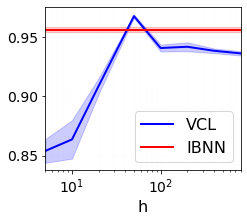

In [426]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

fig, ax = plt.subplots(1, 1, figsize=(3.5, 3))
ax.plot(xs, accs, linewidth=lw, color='b')
ax.fill_between(xs,
               [x - y for x, y in zip(accs, stds)],
               [x + y for x, y in zip(accs, stds)],
               alpha=0.2, color='b')
ax.plot(xs, [acc_ibp]*len(accs), linewidth=lw, color='r')
ax.fill_between(xs,
               [x - y for x, y in zip([acc_ibp]*len(accs), [acc_std_ibp]*len(accs))],
               [x + y for x, y in zip([acc_ibp]*len(accs), [acc_std_ibp]*len(accs))],
               alpha=0.2, color='r')
#ax.axvline(50, c='c')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.legend(['VCL', 'IBNN'], fontsize=legend_size, loc='lower right')
plt.xscale('log')
#ax.set_title('', fontsize=legend_size)
#ax.set_xticks(range(1, len(_ibp_acc[:,i])+1))
ax.set_xlim(5, 800)
ax.set_xlabel('h', fontsize=legend_size)
#import matplotlib.ticker as mticker
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#ax.yaxis.get_major_formatter().set_scientific(False)
#ax.yaxis.get_major_formatter().set_useOffset(False)
#ax.ticklabel_format(useOffset=False, style='plain')
#ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax.tick_params(labelsize=tick_size)
#ax.set_ylabel('Accuracy', fontsize=legend_size)
#ax[5].legend()
plt.savefig("plots/accs_perm_h_study.pdf", bbox_inches='tight')
fig.show()

# CL2

In [149]:
with open('../ddm/results/permuted_mnist_res5_perm_l1_sh_new.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [150]:
with open('../ddm/results/permuted_mnist_res5_perm_l1_sh.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [153]:
with open('../ddm/results/permuted_mnist_res5_perm_sh_bl100.pkl', 'rb') as input_file:
    d_bl100 = pickle.load(input_file)
d_bl100.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [154]:
with open('results/permuted_mnist_perm_cl2_ts_.pkl', 'rb') as input_file:
    d_ts = pickle.load(input_file)
d_ts.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [155]:
d_ts['vcl_ibp'].shape

(2, 2, 5, 5)

In [407]:
Zs_ibp = d['Z']
[item.shape for item in Zs_ibp[4]]

[(1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100),
 (1, 10000, 100)]

In [157]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_ts_acc = d_ts['vcl_ibp'][0,:,:,:] # 5, 5, 5
vcl_result_h5 = d_baselines['vcl_baselines'][5]
vcl_result_h50 = d_baselines['vcl_baselines'][50]
vcl_result_h100 = d_bl100['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_ibp_ts_acc = np.mean(ibp_ts_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__ibp_ts_acc = np.nanmean(ibp_ts_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

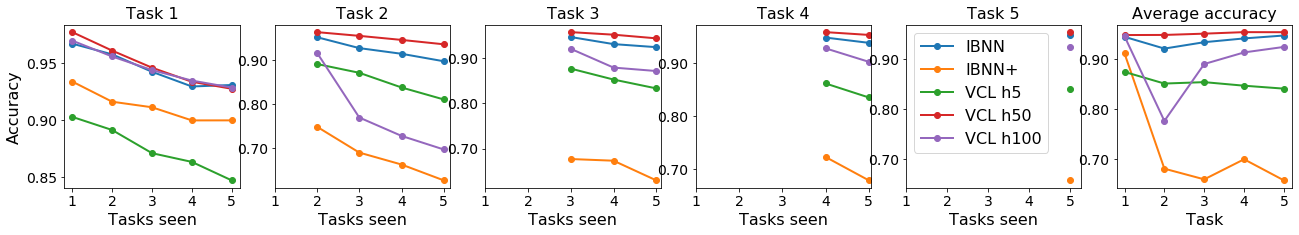

In [158]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_ts_acc[:, i]))+1, _ibp_ts_acc[:, i], label='IBNN+', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_ts_acc))+1, __ibp_ts_acc, label='IBNN+', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
plt.savefig("plots/accs_all_ibp_perm_l1_sh.pdf", bbox_inches='tight')
fig.show()

In [159]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies IBP +: {0}, pm {1}".format(np.nanmean(ibp_ts_acc), np.nanmean(np.nanstd(ibp_ts_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9365973333333333, pm 0.00613091630882523
Overall accuracies IBP +: 0.754686807177741, pm 0.029917754276895317
Overall accuracies VCL h5: 0.8587306666666666 pm 0.003763207937658027
Overall accuracies VCL h50: 0.9506226666666665 pm 0.003899653522012814
Overall accuracies VCL h100: 0.8842732859764421 pm 0.01870146503533352


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [13]:
(0.9506226666666665 - 0.8587306666666666)*100

9.189199999999985

In [324]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

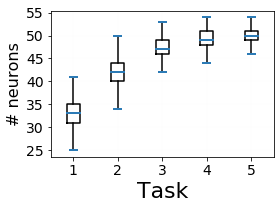

In [325]:
fig_size=(4, 3)
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.ylabel('# neurons', fontsize=legend_size)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_bp_ibp_perm_sh.pdf', bbox_inches='tight')
plt.show()

In [311]:
# permuted_mnist_res5_perm_l1_mh_new
# split_mnist_res5_split_normal_l1_mh
with open('results/split_mnist_res5_split_normal_l1_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [312]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_a = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [313]:
# split_mnist_res5_random_mh
# split_mnist_res5_background_mh
with open('results/split_mnist_res5_random_mh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [314]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_b = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [315]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

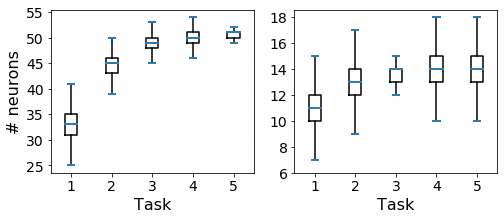

In [310]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_a[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpr, '#2C7BB6')

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_b[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpl, '#2C7BB6')

for i in range(2):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax[0].set_yticks(range(25, 60, 5))
ax[1].set_yticks(range(6, 20, 2))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
#ax[0].set_title('H-IBP', fontsize=legend_size)
#ax[1].set_title('IBP', fontsize=legend_size)
plt.savefig('plots/Zs_bp_perm_mnistb_l1.pdf', bbox_inches='tight')
plt.show()

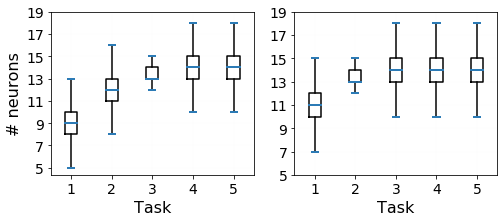

In [316]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_a[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpr, '#2C7BB6')

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_b[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpl, '#2C7BB6')

for i in range(2):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax[0].set_yticks(range(5, 20, 2))
ax[1].set_yticks(range(5, 20, 2))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
#ax[0].set_title('H-IBP', fontsize=legend_size)
#ax[1].set_title('IBP', fontsize=legend_size)
plt.savefig('plots/Zs_bp_mnist_mnistr_l1.pdf', bbox_inches='tight')
plt.show()

In [326]:
with open('results/split_mnist_res5_split_normal_l1_sh.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_a = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [327]:
with open('results/split_mnist_res5_ibp_rs_split_random_random_l1_rs_sh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
Z_ibp = d_rs['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_b = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [328]:
with open('results/split_mnist_res5_split_normal_l1_mh.pkl', 'rb') as input_file:
    d_rs = pickle.load(input_file)
Z_ibp = d_rs['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp_c = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

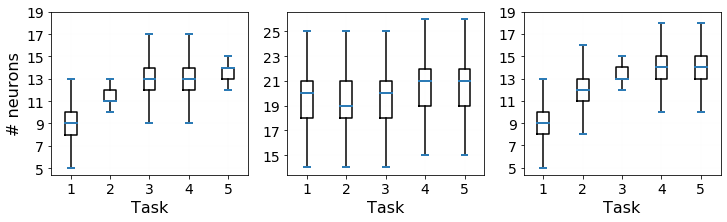

In [333]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
bpr = ax[0].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_a[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpr, '#2C7BB6')

bpl = ax[1].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_b[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpl, '#2C7BB6')

bpl = ax[2].boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp_c[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
set_box_color(bpl, '#2C7BB6')

for i in range(3):
    plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[i].set_xticks(range(0, len(ticks) * 2, 2)) 
    ax[i].set_xticklabels(ticks, fontsize=tick_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].set_xlim(-1, len(ticks)*2 -1)
    ax[i].set_xlabel('Task', fontsize=legend_size)
    ax[i].yaxis.set_tick_params(labelsize=tick_size)
    ax[i].grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax[0].set_yticks(range(5, 20, 2))
ax[1].set_yticks(range(15, 27, 2))
ax[2].set_yticks(range(5, 20, 2))
ax[0].set_ylabel('# neurons', fontsize=legend_size)
#plt.tight_layout()
plt.savefig('plots/Zs_bp_mnist_mnistr_mnistb_cl2_l1.pdf', bbox_inches='tight')
plt.show()

## CL3

In [25]:
with open('results/permuted_mnist_perm_l1_mh_new_cl3.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_baselines', 'uncerts_ibp', 'uncerts_vcl_baselines', 'Z'])

In [26]:
d['vcl_baselines'].keys()

dict_keys([5, 50, 100])

In [27]:
ibp_acc = d['vcl_ibp'] # 5, 5, 5
vcl_result_h5 = d['vcl_baselines'][5]
vcl_result_h50 = d['vcl_baselines'][50]
vcl_result_h100 = d['vcl_baselines'][100]
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
_vcl_result_h100 = np.mean(vcl_result_h100, 0)
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))
__vcl_result_h100 = np.nanmean(vcl_result_h100, (0,1))

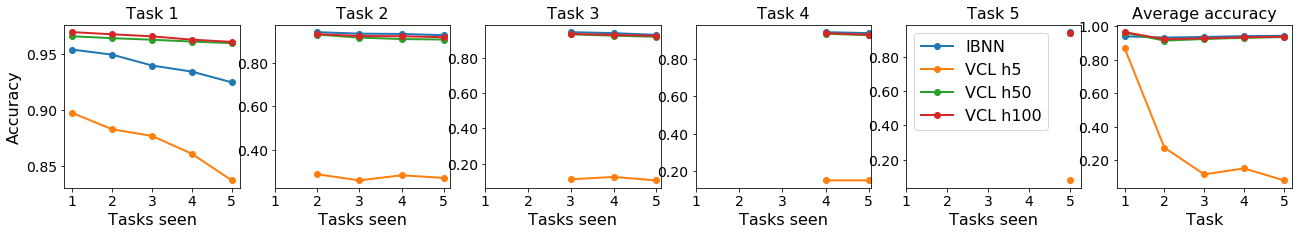

In [28]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1",
          1: "Task 2",
          2: "Task 3",
          3: "Task 4",
          4: "Task 5"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='IBNN', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h100[:, i]))+1, _vcl_result_h100[:, i], label='VCL h100', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks seen', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='IBNN', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __vcl_result_h100, label='VCL h100', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('Task', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/accs_all_ibp_perm_l1_cl3.pdf", bbox_inches='tight')
fig.show()

In [29]:
print("Overall accuracies IBP: {0}, pm {1}".format(np.nanmean(ibp_acc), np.nanmean(np.nanstd(ibp_acc, 0))))
print("Overall accuracies VCL h5: {0} pm {1}".format(np.nanmean(vcl_result_h5), np.nanmean(np.nanstd(vcl_result_h5, 0))))
print("Overall accuracies VCL h50: {0} pm {1}".format(np.nanmean(vcl_result_h50), np.nanmean(np.nanstd(vcl_result_h50, 0))))
print("Overall accuracies VCL h100: {0} pm {1}".format(np.nanmean(vcl_result_h100), np.nanmean(np.nanstd(vcl_result_h100, 0))))

Overall accuracies IBP: 0.9379896225506749, pm 0.0024919133459991097
Overall accuracies VCL h5: 0.41266364709525233 pm 0.049388817423424734
Overall accuracies VCL h50: 0.9362795223566047 pm 0.002216296995500788
Overall accuracies VCL h100: 0.9406673521331593 pm 0.002046669178954181


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [33]:
(0.9406673521331593 - 0.41266364709525233)*100

52.800370503790695

In [30]:
Z_ibp = d['Z']

num_runs = 5
num_layers=1
num_tasks=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Z_ibp[i][j]))
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]

In [31]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 1
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]
fig_size=(4, 3)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    plt.setp(bp['caps'], color=color, lw=2)
    plt.setp(bp['medians'], color=color, lw=2)

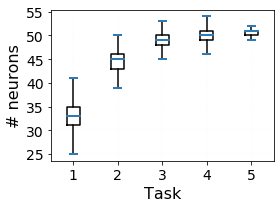

In [32]:
fig_size=(4, 3)
plt.figure(figsize=fig_size)
if num_layers==2:
    bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, '#2C7BB6')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='#D7191C', label='Layer 1')
    plt.plot([], c='#2C7BB6', label='Layer 2')
    plt.legend(fontsize=legend_size)
elif num_layers==1:
    bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_tasks)],
                      positions=np.array(range(num_tasks))*2.0, sym='', widths=0.6)
    set_box_color(bpr, '#2C7BB6')

    #plt.plot([], c='#D7191C', label='Layer 1')
    #plt.plot([], c='#2C7BB6', label='Layer 2')
plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2-1)
plt.ylabel('# neurons', fontsize=legend_size)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_bp_ibp_perm_sh.pdf', bbox_inches='tight')
plt.show()